## Library

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


### 3D part

In [2]:
%matplotlib widget

In [150]:
with h5py.File(f'grad1/total_50_6k_1.h5', 'r') as f:
    grad = f['grad'][:]
grad_sum = np.sum(grad,axis=(0,1))

#### Frequency Sensitivity

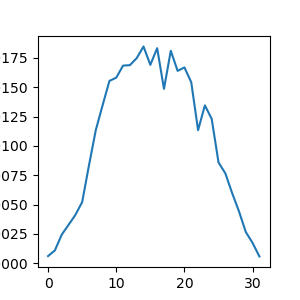

In [151]:
fig = plt.figure(figsize=(3,3))
freq_max = np.max(grad_sum,axis=1)                  #ABS here
plt.plot(freq_max)

In [152]:
freq_max_index = np.argmax(grad_sum,axis=1)                 #ABS here
freq_xdata = np.arange(freq_max.shape[0])
freq_ydata = freq_max_index
freq_zdata = freq_max

In [153]:

xdata = np.tile(np.arange(grad_sum.shape[0]),grad_sum.shape[1])
ydata = np.repeat(np.arange(grad_sum.shape[1]),grad_sum.shape[0])
zdata = (grad_sum.T).flatten()


(-2.0, 177.0)

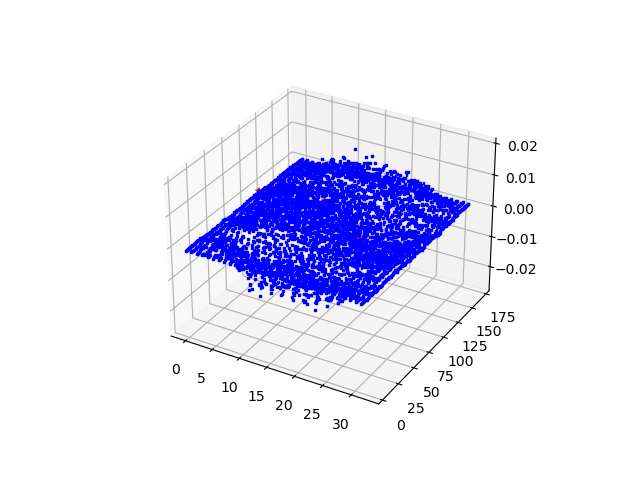

In [154]:
#plt.clf()
plt.interactive(True)
fig= plt.figure()

ax = plt.axes(projection ="3d")

ax.scatter3D(xdata,ydata,zdata, marker=",",alpha=1,c='b',s=2)

ax.scatter3D(freq_xdata,freq_ydata,freq_zdata, marker="*",alpha=1,c='r',s=20)
ax.set_xlim([-2, 34])
ax.set_ylim([-2,177])

**Remember to close the fig component**

In [149]:
plt.close('all')

## Right key vs Wrong key

In [28]:
grad_np = np.zeros((256,200))
grad_sum_np = np.zeros((256,200))

for i in range(256):
    with h5py.File(f'grad1/total_50_6k_{i}.h5', 'r') as f:
        grad = f['grad'][:]
    grad_sum_ascad = np.sum(np.abs(grad),axis=(1,2,3))
    grad_np[i,:] = grad_sum_ascad
grad_np.shape

(256, 200)

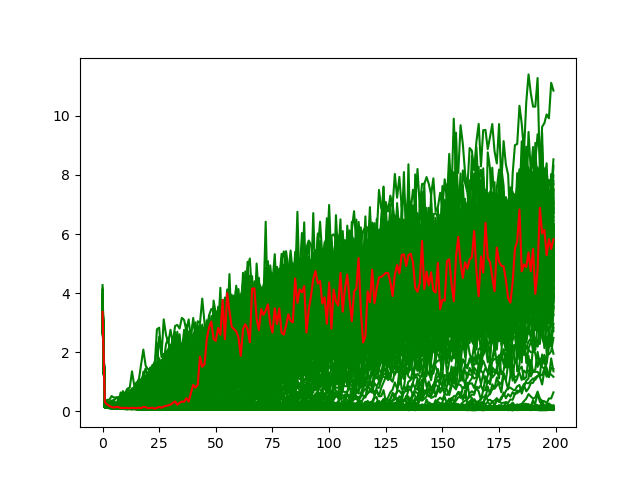

In [35]:

plt.plot(grad_np[:].T,c='g')
plt.plot(grad_np[0], c = 'r')

In [177]:
plt.close('all')

# Download Part


In [ ]:
import wandb
import numpy as np
import h5py
api = wandb.Api()
# Project is specified by <entity/project-name>
project_name = "seed_scattering_5K_all1001"
runs = api.runs(f'aceleo/{project_name}')
vali_list = np.zeros((256,200))
train_list = np.zeros((256,200))
key = np.zeros(256)

account = 0
for run in runs: 
    temp = run.history()
    vali_list[account,:] =  temp.loc[:,'vali_loss'].to_numpy()
    train_list[account,:] =  temp.loc[:,'loss'].to_numpy()
    key[account] = temp.loc[1,"key"]
    account+=1     


In [17]:
import wandb
import numpy as np
import h5py
api = wandb.Api()
# Project is specified by <entity/project-name>
project_name = "test_for_new_50"
runs = api.runs(f'aceleo/{project_name}')
vali_list = np.zeros((256,200))
train_list = np.zeros((256,200))
key = np.zeros(256)


In [18]:
account = 0
index_list = []
for run in runs:
    try:
        if(run.summary['vali_loss']<0.88):
            index_list.append(account)
    except:
        print(account)
    account += 1 

80
81


In [49]:
run.config['J']

3

In [45]:
run = runs[0]
for key in run.config:


J


TypeError: 'Run' object is not subscriptable

In [39]:
def config_extract(project_name, index):
    api = wandb.Api()
    # Project is specified by <entity/project-name>
    project_name = "scattering_5k_100_final"
    runs = api.runs(f'aceleo/{project_name}')
    wrong_key = [x for x in range(256)]   
    run = runs[index].config
    for key in run:
        run[key] = {'values': [run[key]]}
    run['wrong_key']['values'] = wrong_key

    sweep_configuration = {
        'method': 'grid',              
        'name': 'sweep',
        'metric': {'goal': 'minimize', 'name': 'vali_loss'},
        'parameters': run
    }
    return sweep_configuration

In [40]:
config_extract("test_for_new_50",11)

TypeError: 'Run' object is not subscriptable

In [19]:
index_list

[11, 39, 42]

In [31]:

runs[11].history()

,_step,loss,vali_set_total_correct,_runtime,epoch,vali_loss,key,_timestamp,parameters/graph_68fc1.weight,parameters/graph_68fc2.bias,parameters/graph_68fc2.weight,parameters/graph_68fc1.bias,parameters/graph_68fc3.bias,parameters/graph_68fc3.weight
0,0,0.000000,1.0,5.635751,0.0,0.947560,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3.869355,1.0,5.648775,1.0,0.953997,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.895889,1.0,5.660986,2.0,0.961757,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.841862,1.0,5.673232,3.0,0.962110,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3.877758,1.0,5.685480,4.0,0.958555,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,1.732359,1.0,8.193619,196.0,0.847926,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
197,197,1.687329,1.0,8.205658,197.0,0.847043,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
198,198,1.685903,1.0,8.217719,198.0,0.846075,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN
199,199,1.678897,1.0,8.282073,199.0,0.845406,224.0,1.666802e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
runs[70].summary['vali_loss']

0.9749768972396852

In [2]:
wrong_key = np.arange(256)
a = runs[0].config




In [3]:
a

{'J': 3,
 'Q': 64,
 'lr': 0.00040181698655312336,
 'path': '/data/SCA_data/ASCAD_data/ASCAD_databases/ASCAD_desync50.h5',
 'dense': 1,
 'layer': 7,
 'epochs': 200,
 'kernel': 2,
 'channel_1': 30,
 'channel_2': 64,
 'channel_3': 32,
 'optimizer': 'adam',
 'wrong_key': 0,
 'traces_num': 2500,
 'kernel_width': 3,
 'project_name': 'total_50_2.5k_scattering',
 'loss_function': 'mine_cross',
 'vali_batch_size': 1000,
 'train_batch_size': 500}

In [38]:
for key in a:
    a[key] = {'values': [a[key]]}


In [43]:
a['wrong_key']['values'] = wrong_key

In [44]:
a

{'J': {'values': [2]},
 'Q': {'values': [32]},
 'lr': {'values': [0.0005]},
 'path': {'values': ['/data/SCA_data/ASCAD_data/ASCAD_databases/ASCAD_desync100.h5']},
 'dense': {'values': [2]},
 'layer': {'values': [4]},
 'epochs': {'values': [200]},
 'kernel': {'values': [4]},
 'channel_1': {'values': [4]},
 'channel_2': {'values': [16]},
 'channel_3': {'values': [32]},
 'optimizer': {'values': ['rmsprop']},
 'wrong_key': {'values': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  

In [40]:
sweep_configuration00 = {
'method': 'grid',              #'bayes',
'name': 'sweep',
'metric': {'goal': 'minimize', 'name': 'vali_loss'},
'parameters': a
}

In [41]:
sweep_configuration00

{'method': 'grid',
 'name': 'sweep',
 'metric': {'goal': 'minimize', 'name': 'vali_loss'},
 'parameters': {'J': {'values': [2]},
  'Q': {'values': [32]},
  'lr': {'values': [0.0005]},
  'path': {'values': ['/data/SCA_data/ASCAD_data/ASCAD_databases/ASCAD_desync100.h5']},
  'dense': {'values': [2]},
  'layer': {'values': [4]},
  'epochs': {'values': [200]},
  'kernel': {'values': [4]},
  'channel_1': {'values': [4]},
  'channel_2': {'values': [16]},
  'channel_3': {'values': [32]},
  'optimizer': {'values': ['rmsprop']},
  'wrong_key': {'values': [240]},
  'traces_num': {'values': [5000]},
  'kernel_width': {'values': [8]},
  'project_name': {'values': ['total_100_5k_scattering']},
  'loss_function': {'values': ['mine_cross']}}}

In [ ]:
with h5py.File(f'desync100_5k.h5', 'w') as f:
    f.create_dataset('vali_loss', data=vali_list)
    f.create_dataset('train_loss', data=train_list)
    f.create_dataset('key', data=key)

# Test Part

In [156]:
with h5py.File(f'grad1/total_50_6k_0.h5', 'r') as f:
    grad = f['grad'][:]
grad_sum_r = np.sum(grad,axis=(0,1))

with h5py.File(f'grad1/total_50_6k_1.h5', 'r') as f:
    grad = f['grad'][:]
grad_sum_w = np.sum(grad,axis=(0,1))

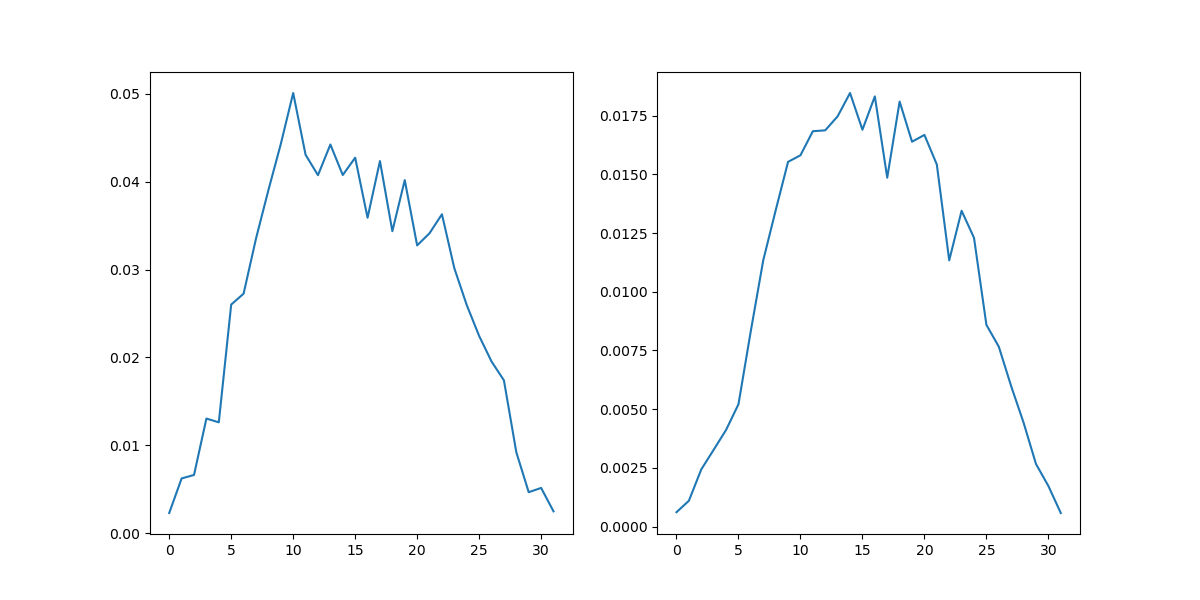

In [164]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

freq_max_r = np.max(grad_sum_r,axis=1)                  #ABS here
freq_max_w = np.max(grad_sum_w,axis=1)                  #ABS here

plt.plot(freq_max_r)
plt.subplot(1,2,2)
plt.plot(freq_max_w)


In [165]:
freq_max_index = np.argmax(grad_sum_r,axis=1)                 #ABS here
freq_xdata_r = np.arange(freq_max_r.shape[0])
freq_ydata_r = freq_max_index
freq_zdata_r = freq_max

freq_max_index = np.argmax(grad_sum_w,axis=1)                 #ABS here
freq_xdata_w = np.arange(freq_max_w.shape[0])
freq_ydata_w = freq_max_index
freq_zdata_w = freq_max

In [167]:

xdata_r = np.tile(np.arange(grad_sum_r.shape[0]),grad_sum_r.shape[1])
ydata_r = np.repeat(np.arange(grad_sum_r.shape[1]),grad_sum_r.shape[0])
zdata_r = (grad_sum_r.T).flatten()


xdata_w = np.tile(np.arange(grad_sum_w.shape[0]),grad_sum_w.shape[1])
ydata_w = np.repeat(np.arange(grad_sum_w.shape[1]),grad_sum_w.shape[0])
zdata_w = (grad_sum_w.T).flatten()

(-2.0, 177.0)

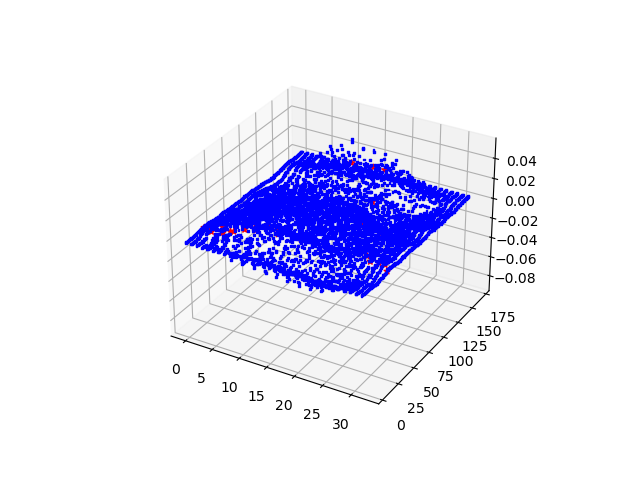

In [188]:
#plt.clf()
plt.interactive(True)



ax = plt.axes(projection ="3d")

ax.scatter3D(xdata_r,ydata_r,zdata_r, marker=",",alpha=1,c='b',s=2)

ax.scatter3D(freq_xdata_r,freq_ydata_r,freq_zdata_r, marker="*",alpha=1,c='r',s=20)
ax.set_xlim([-2, 34])
ax.set_ylim([-2,177])






In [191]:
plt.close("all")

(-2.0, 177.0)

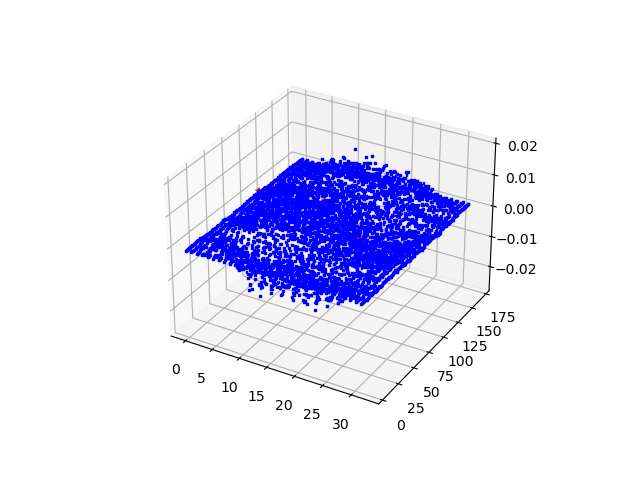

In [192]:


ax = plt.axes(projection ="3d")

ax.scatter3D(xdata_w,ydata_w,zdata_w, marker=",",alpha=1,c='b',s=2)

ax.scatter3D(freq_xdata_w,freq_ydata_w,freq_zdata_w, marker="*",alpha=1,c='r',s=20)
ax.set_xlim([-2, 34])
ax.set_ylim([-2,177])